In [1]:
import pandas as pd

In [9]:
#Create list of tickers that openinsider won't recognize (generally foreign companies
#that don't have to report insider transactions, but in some cases firms were either
#merged into others, acquired, or went bankrupt)
#remove_these_firms = ['ADAPT:ST','0A1R.IL','MCG.JO','CLEGF','RVRA','OTC:EPOKY',
 #                    'MFGP','MTAGF','IDRSF','ETTYF','TSX:IPCO','ECN.TO','UN01',
  #                   'HHDS','RACE','TSSLF','AAMMF','S32.AX','LSE:INDV','LBDRK',
   #                  'LTRPB','PGN (BANKRUPT)','HEL:VALMT','ASX:ORA','Munich:OSR',
    #                 'Paris:FNAC','CHRYY','POOSF','NTCPF','ENRFF','TSRYY','APEMY','HAWK (LIQUIDATED)']

In [10]:
#remove tickers from original list that openinsider won't recognize
#tickers = [elem for elem in tickers if elem not in remove_these_firms]

In [11]:
#create empty dataframe that will later be populated by the pulled transactions
#insider = pd.DataFrame()

In [12]:
#loop through companies list and get the last 500 buy or sell transactions#
#for ticker in tickers:
#    insider1 = pd.read_html(f'http://openinsider.com/screener?s={ticker}&o=&pl=&ph=&ll=&lh=&fd=0&fdr=&td=0&tdr=&fdlyl=&fdlyh=&daysago=&xp=1&xs=1&vl=&vh=&ocl=&och=&sic1=-1&sicl=100&sich=9999&isofficer=1&iscob=1&isceo=1&ispres=1&iscoo=1&iscfo=1&isgc=1&isvp=1&isdirector=1&istenpercent=0&grp=0&nfl=&nfh=&nil=&nih=&nol=&noh=&v2l=&v2h=&oc2l=&oc2h=&sortcol=0&cnt=1000&page=1')
#    #change the object that we pull the data from, from the entire page at the link to the third table, which contains the insider trading data
#    insider1 = insider1[-3]
#   insider = pd.concat([insider,insider1])



In [13]:
#Removing columns that aren't useful
#insider = insider.drop([0,1,'1d','1m','1w','6m'],axis=1)

In [14]:
#Confirming that colums were removed
#insider.head()

In [15]:
#Defining own column names due to difficulty removing filing date and delta (symbol) owned without it
#insider.columns = ['Filing Date','Name','Owned','Price','Qty','Ticker','Title','Trade Date','Trade Type','Value','X','Delta Owned']

In [16]:
#Drop unnecessary features
#insider = insider.drop(['Filing Date','Name','Owned','Title','X','Delta Owned'],axis=1)

In [17]:
#insider.head()

In [18]:
#Convert value in string format to value in float format
#insider['Value No $'] = insider['Value'].str.replace('$','')
#insider['Value No $ or Comma'] = insider['Value No $'].str.replace(',','')
#insider['Value No $ or Comma'] = insider['Value No $ or Comma'].astype(float)

In [19]:
#Clean redundant/transition columns used to convert from string to float
#insider = insider.drop(['Value','Value No $'],axis=1)

In [20]:
#insider.columns = ['Price','Qty','Ticker','Trade Date','Trade Type','Value']

In [21]:
#Sum values based on ticker
#pd.set_option('display.max_rows', None)
#by_ticker = insider.groupby('Ticker')['Value'].sum()
#generate CSV so I can copy-paste these values into the Excel dataset and use IFNA + vlookup to populate the values
#by_ticker.to_csv('value_by_ticker.csv')

In [2]:
#import dataset for algo
real_deal_df = pd.read_csv('Spinoff Situations Full Data.csv')

In [3]:
real_deal_df.head()

,Unnamed: 0,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket
0,0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low
1,1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High
2,2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid
3,3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid
4,4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High


In [4]:
#remove unnecessary features
real_deal_df = real_deal_df.drop('Unnamed: 0',axis=1)

In [5]:
#Check that features are gone
real_deal_df.head()

,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket
0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low
1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High
2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid
3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid
4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High


In [95]:
#real_deal_df.columns = ['Spinoff_Name','Spinoff_Ticker','Sector','P0','1-Year_Return_(As Decimal)','Insiders_Purchase_vs_Sell_Margin_by_Value']

In [96]:
#real_deal_df.head()

In [6]:
import numpy as np

In [7]:
real_deal_df.head()

,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket
0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low
1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High
2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid
3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid
4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High


In [99]:
real_deal_df['Sector'].value_counts()

Consumer Discretionary    29
Energy                    23
Industrials               22
Real Estate               22
Communication Services    19
Materials                 18
Healthcare                16
Financials                13
Information Technology    12
Consumer Staples           2
Utilities                  1
Name: Sector, dtype: int64

In [27]:
#real_deal_df[real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()]

In [28]:
#Determine median value of each secto
#healthcare_median = real_deal_df[real_deal_df['Sector']=='Healthcare']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [29]:
#real_estate_median = real_deal_df[real_deal_df['Sector']=='Real Estate']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [30]:
#energy_median = real_deal_df[real_deal_df['Sector']=='Energy']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [31]:
#comms_services_median = real_deal_df[real_deal_df['Sector']=='Communication Services']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()
#comms_services_median

In [32]:
#industrials_median = real_deal_df[real_deal_df['Sector']=='Industrials']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [33]:
#financials_median = real_deal_df[real_deal_df['Sector']=='Financials']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [34]:
#info_tech_median = real_deal_df[real_deal_df['Sector']=='Information Technology']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [35]:
#cons_disc_median = real_deal_df[real_deal_df['Sector']=='Consumer Discretionary']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [36]:
#cons_staples_median = real_deal_df[real_deal_df['Sector']=='Consumer Staples']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [37]:
#materials_median = real_deal_df[real_deal_df['Sector']=='Materials']['Insiders_Purchase_vs_Sell_Margin_by_Value'].median()

In [38]:
#real_deal_df.loc['ADAPT:ST','Insiders Purchase vs Sell Margin by Value'] = real_estate_median
#real_estate_median

In [39]:
#real_deal_df.loc['HHDS','Insiders Purchase vs Sell Margin by Value'] = real_estate_median

In [40]:
#real_deal_df.loc['FSV','Insiders Purchase vs Sell Margin by Value'] = real_estate_median

In [41]:
#real_deal_df.loc['BPY','Insiders Purchase vs Sell Margin by Value'] = real_estate_median

In [42]:
#real_deal_df = real_deal_df.drop('Insiders Purchase vs Sell Margin by Value',axis=1)

In [43]:
#real_deal_df.head()

In [44]:
#real_deal_df[(real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()) & (real_deal_df['Sector']=='Real Estate')]['Insiders_Purchase_vs_Sell_Margin_by_Value']

In [45]:
#This worked. This is the method to use
#real_deal_df.loc[(real_deal_df['Spinoff_Ticker']=='FSV') | (real_deal_df['Spinoff_Ticker']=='BPY'),'Insiders_Purchase_vs_Sell_Margin_by_Value']=real_estate_median

In [46]:
#real_deal_df[real_deal_df['Sector']=='Real Estate']

In [47]:
#real_deal_df = real_deal_df.drop(['ADAPT:ST','HHDS','FSV','BPY'])

In [48]:
#real_deal_df.tail()

In [49]:
#This works better
#real_deal_df.loc[(real_deal_df['Sector']=='Communication Services') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = comms_services_median

In [50]:
#real_deal_df[real_deal_df['Sector']=='Communication Services']

In [51]:
#Checked to see how much data is still missing
#real_deal_df.isna().sum()

In [52]:
#real_deal_df.loc[(real_deal_df['Sector']=='Real Estate') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = real_estate_median

In [53]:
#real_deal_df[real_deal_df['Sector']=='Real Estate']

In [54]:
#Impute remaining sectors' missing values
#real_deal_df.loc[(real_deal_df['Sector']=='Energy') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = energy_median
#real_deal_df.loc[(real_deal_df['Sector']=='Materials') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = materials_median
#real_deal_df.loc[(real_deal_df['Sector']=='Industrials') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = industrials_median
#Used healthcare median for utilities because there was only one utility firm in the dataset. Utilities is a defensive sector, so I made a judgment call on another defensive sector
#real_deal_df.loc[(real_deal_df['Sector']=='Utilities') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = healthcare_median
#real_deal_df.loc[(real_deal_df['Sector']=='Healthcare') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = healthcare_median
#real_deal_df.loc[(real_deal_df['Sector']=='Financials') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = financials_median
#real_deal_df.loc[(real_deal_df['Sector']=='Consumer Discretionary') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = cons_disc_median
#real_deal_df.loc[(real_deal_df['Sector']=='Consumer Staples') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = cons_staples_median
#real_deal_df.loc[(real_deal_df['Sector']=='Information Technology') & (real_deal_df['Insiders_Purchase_vs_Sell_Margin_by_Value'].isna()),'Insiders_Purchase_vs_Sell_Margin_by_Value'] = info_tech_median

In [55]:
#Check for missing data again
#real_deal_df.isna().sum()

In [56]:
#real_deal_df[real_deal_df['P0'].isna()]

In [57]:
#Create variable for energy median P0
#energy_P0_median = real_deal_df[real_deal_df['Sector']=='Energy']['P0'].median()

In [58]:
#Impute missing P0 values. All were in the energy sector, so used the energy median P0
#real_deal_df['P0'] = real_deal_df['P0'].fillna(energy_P0_median)

In [59]:
#No more missing values
#real_deal_df.isna().sum()

In [60]:
#real_deal_df

In [61]:
#Create new, consolidated CSV file
#real_deal_df.to_csv('Spinoff Situations Cons.csv')

In [8]:
#find 75th, 50th, and 25th percentiles for creating low/mid/high P0 categorical variable
q75, q50, q25 = np.percentile(real_deal_df['P0'],[75,50,25])

In [9]:
#Find dispersion of P0 data to determine if it's worth it to
#create a dummy variable based on statistical distribution
#real_deal_df[(real_deal_df['P0'] > q25) & (real_deal_df['P0'] < q75)]['P0'].count()

In [10]:
#real_deal_df[(real_deal_df['P0'] < q25) | (real_deal_df['P0'] > q75)]['P0'].count()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#qt = QuantileTransformer(n_quantiles=100,output_distribution='normal')

In [11]:
#Define function to calculate standard normal distribution
#To create distribution of P0 that can be visualized easily
#Raw data distribution ranges from .04 to 33,000
#mu = sum(real_deal_df['P0']/len(real_deal_df['P0']))
#import statistics as st
#P0_stdev = st.pstdev(real_deal_df['P0'])
#P0_stdev

#def std_norm_transform(x):
 #       st_normed_x = (x - mu) / P0_stdev
  #      return st_normed_x

In [12]:
#Define function to apply to P0 for splitting into low/medium/high buckets
#def buckets(y):
 #   if y <= q25:
  #      return("Low")
   # elif (y > q25) & (y <= q75):
    #    return("Mid")
    #else:
     #   return("High")

In [13]:
#Tried normalizing the P0 data because it had extremely high dispersion that screwed up the visuals. It didn't work
#real_deal_df['Std Norm Result'] = real_deal_df['P0'].apply(lambda x:std_norm_transform(x))

In [70]:
#real_deal_df.head()

In [115]:
#Create the buckets column
#real_deal_df['P0 Bucket'] = real_deal_df['P0'].apply(lambda x:buckets(x))

In [77]:
#Check that buckets populated
#real_deal_df.head()

In [71]:
#second_deal_df = real_deal_df[['Spinoff_Name','Spinoff_Ticker','Sector','Std Norm Result']]

In [72]:
#second_deal_df.head()

In [73]:
#sns.distplot(second_deal_df['Std Norm Result'])

In [78]:
#real_deal_df[real_deal_df['P0'] == real_deal_df['P0'].max()]

In [12]:
#Drop Phio as the outlier messing up the visuals
real_deal_df = real_deal_df.drop([154])

Text(0,0.5,'Initial Price')

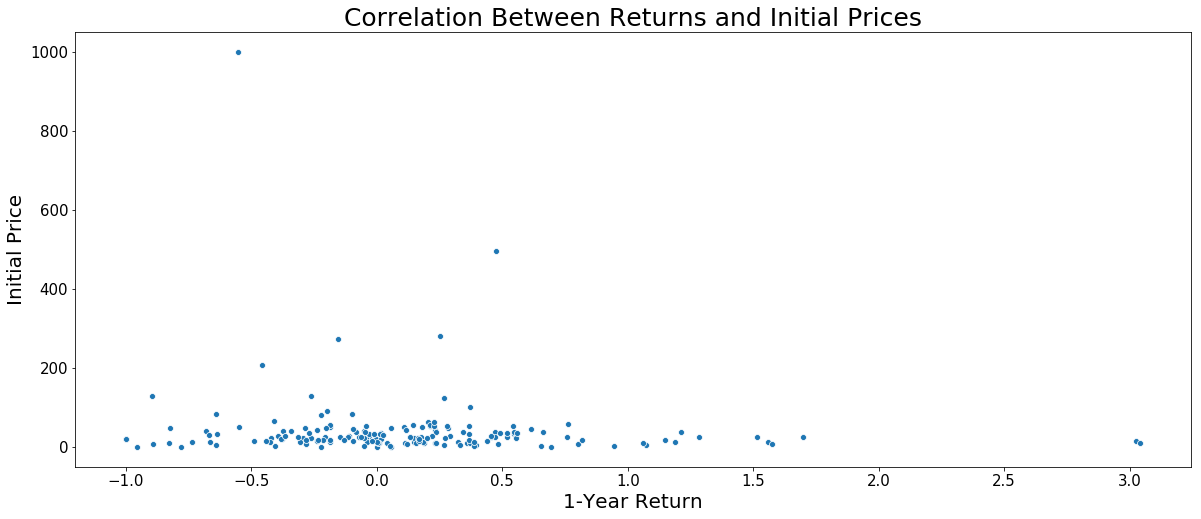

In [8]:
#Visually gauge relationship between 1-year return and initial price.
#Very weak, but want some concrete numbers to quantify this
plt.figure(figsize=(20,8))
sns.scatterplot(real_deal_df['1-Year_Return_As_Decimal'],real_deal_df['P0'])
plt.title('Correlation Between Returns and Initial Prices',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(fontsize=20,s="1-Year Return")
plt.ylabel(fontsize=20,s='Initial Price',)

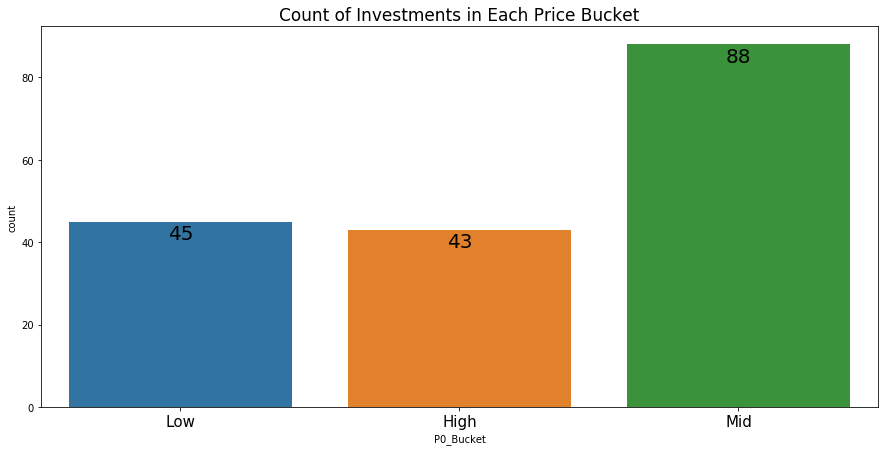

In [9]:
#Visually gauge dataset balance between buckets
plt.figure(figsize=(15,7))
plt.title('Count of Investments in Each Price Bucket',fontsize=17)
plt.xticks(fontsize=13)
bucket_plot = sns.countplot(real_deal_df['P0_Bucket'])
plt.xticks(fontsize=15)
for each in bucket_plot.patches:
    bucket_plot.annotate(format(each.get_height()),
                         (each.get_x() + each.get_width() / 2,
                         each.get_height()),ha='center',va='center',
                         size=20,xytext=(0,-12),
                         textcoords='offset points')
bucket_plot

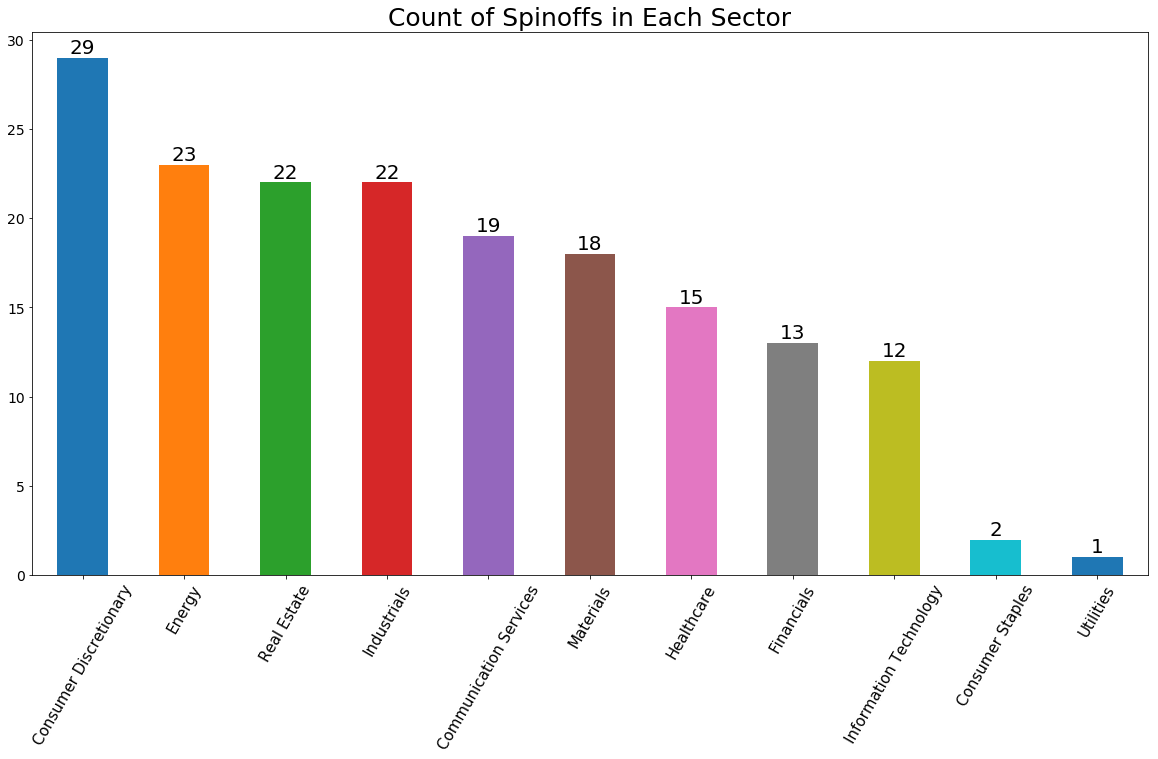

In [10]:
#order these from greatest to least
plt.figure(figsize=(20,10))
plt.title('Count of Spinoffs in Each Sector',fontsize=25)
plots = real_deal_df['Sector'].value_counts().plot(kind="bar")
plt.xticks(fontsize=15,rotation=60)
plt.yticks(fontsize=14)
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()),ha='center',va='center',
                   size=20, xytext=(0,10),
                   textcoords='offset points')
plots

In [25]:
#Very weak correlation between initial price and return
real_deal_df[['1-Year_Return_As_Decimal','P0']].corr()

,1-Year_Return_As_Decimal,P0
1-Year_Return_As_Decimal,1.000000,-0.096235
P0,-0.096235,1.000000


(array([-3.0e+09, -2.5e+09, -2.0e+09, -1.5e+09, -1.0e+09, -5.0e+08,
         0.0e+00,  5.0e+08]), <a list of 8 Text yticklabel objects>)

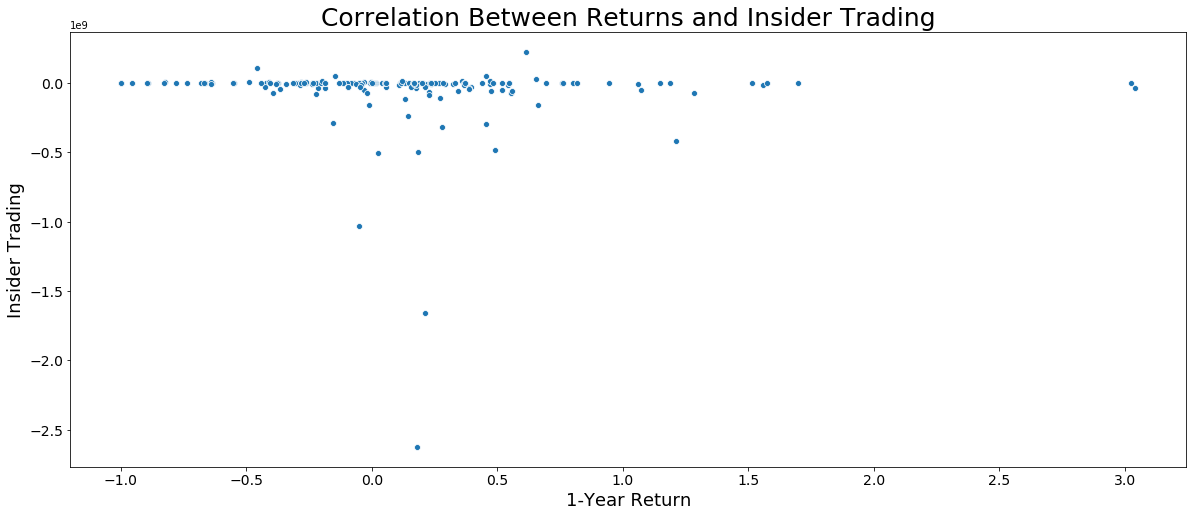

In [90]:
plt.figure(figsize=(20,8))
sns.scatterplot(real_deal_df['1-Year_Return_As_Decimal'],real_deal_df['Insiders_Buy_Sell_Margin_by_Value'])
plt.title('Correlation Between Returns and Insider Trading',fontsize=25)
plt.xlabel(s='1-Year Return',fontsize=18)
plt.ylabel('Insider Trading',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [109]:
#Also a very weak correlation.
real_deal_df[['1-Year_Return_As_Decimal','Insiders_Buy_Sell_Margin_by_Value']].corr()

,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value
1-Year_Return_As_Decimal,1.000000,-0.046893
Insiders_Buy_Sell_Margin_by_Value,-0.046893,1.000000


In [110]:
real_deal_df.head()

,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket
0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low
1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High
2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid
3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid
4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High


In [111]:
#So we know now that the initial price and insider trading margin are poor drivers to use for predictng good returns
#Still going to run a logistic regression model to see if the sector tells us anything, but this data simply might be worth
#very little for predicting spinoff investment success

In [26]:
#Create dummy variable for sector
sector_dummy = pd.get_dummies(real_deal_df['Sector'],drop_first=True)

In [27]:
#confirm dummy was created correctly
sector_dummy.head()

,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrials,Information Technology,Materials,Real Estate,Utilities
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [28]:
#Concat initial df and dummy df
real_deal_df = pd.concat([real_deal_df,sector_dummy],axis=1)

In [29]:
#See if combined df looks right
real_deal_df.head()

,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrials,Information Technology,Materials,Real Estate,Utilities
0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low,0,0,0,0,0,0,0,0,1,0
1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High,0,0,0,0,0,1,0,0,0,0
2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid,0,0,0,0,0,0,0,1,0,0
3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid,1,0,0,0,0,0,0,0,0,0
4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High,0,0,0,0,1,0,0,0,0,0


In [30]:
#Remove Unnamed feature
#real_deal_df = real_deal_df.drop("Unnamed: 0",axis=1)

In [31]:
new_df = real_deal_df

In [32]:
new_df.head()

,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrials,Information Technology,Materials,Real Estate,Utilities
0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low,0,0,0,0,0,0,0,0,1,0
1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High,0,0,0,0,0,1,0,0,0,0
2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid,0,0,0,0,0,0,0,1,0,0
3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid,1,0,0,0,0,0,0,0,0,0
4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High,0,0,0,0,1,0,0,0,0,0


In [33]:
#Define function to evaluate good or bad investments based on return
def good_investment(z):
    if z > .1:
        return("Good")
    else:
        return("Bad")

In [34]:
new_df['Decision'] = new_df['1-Year_Return_As_Decimal'].apply(lambda x:good_investment(x))

In [35]:
decision_dummy = pd.get_dummies(new_df,columns=['Decision'],drop_first=True)

In [36]:
new_df = decision_dummy

In [37]:
new_df.head()

,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrials,Information Technology,Materials,Real Estate,Utilities,Decision_Good
0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low,0,0,0,0,0,0,0,0,1,0,1
1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High,0,0,0,0,0,1,0,0,0,0,1
2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid,0,0,0,0,0,0,0,1,0,0,1
3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid,1,0,0,0,0,0,0,0,0,0,1
4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High,0,0,0,0,1,0,0,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split

In [45]:
#new_df = new_df.drop(['Spinoff_Name','Spinoff_Ticker','Sector','P0_Bucket'],axis=1)

In [57]:
new_df.head()
new_df.to_csv('Dummified Spinoff Data.csv')

In [38]:
X = new_df[['P0','Insiders_Buy_Sell_Margin_by_Value','Consumer Discretionary','Consumer Staples','Energy','Financials','Healthcare','Industrials','Information Technology','Materials','Real Estate','Utilities']]
y = new_df['Decision_Good']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
#Would not converge.
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

         Current function value: 63.294422
         Iterations: 35


C:\Users\magilmartin\AppData\Local\Continuum\anaconda3.1\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [69]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.52      0.61        33
          1       0.56      0.77      0.65        26

avg / total       0.66      0.63      0.62        59



In [72]:
print(logmodel.coef_, logmodel.intercept_)

[[-1.15942857e-14 -5.59291712e-09 -6.01881677e-17  1.37904550e-17
  -7.39954140e-17 -8.46336605e-17  3.37009370e-17 -2.67623275e-17
  -2.38132825e-18  1.32953008e-17 -1.70592669e-17  1.05565451e-17]] [-1.16183251e-16]


In [73]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:          Decision_Good   No. Observations:                  117
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                           11
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                     inf
Time:                        21:41:03   Log-Likelihood:                -7405.4
converged:                      False   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
P0                                    0.0002      0.002      0.111      0.911      -0.004       0.004
Insiders_Buy_Sell_Margin_by_Value -6.394e-09   3.01e-09     -2

C:\Users\magilmartin\AppData\Local\Continuum\anaconda3.1\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\magilmartin\AppData\Local\Continuum\anaconda3.1\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\magilmartin\AppData\Local\Continuum\anaconda3.1\lib\site-packages\statsmodels\discrete\discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


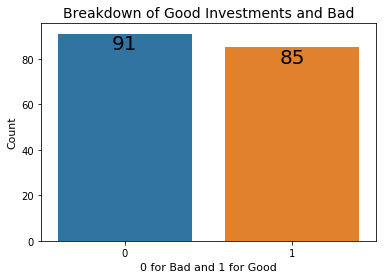

In [82]:
#Balance of good investments vs bad
breakdown_plot = sns.countplot(new_df['Decision_Good'])
plt.title('Breakdown of Good Investments and Bad', fontsize=14)
plt.xlabel(s='0 for Bad and 1 for Good',fontsize=11)
plt.ylabel(s='Count',fontsize=11)

for each in breakdown_plot.patches:
    breakdown_plot.annotate(format(each.get_height()),
                   (each.get_x() + each.get_width() / 2,
                   each.get_height()),ha='center',va='center',
                   size=20, xytext=(0,-10),
                   textcoords='offset points')


In [143]:
real_deal_df.groupby('Sector').describe()

P0                                              \
                       count        mean         std        min      25%   
Sector                                                                     
Communication Services  19.0   55.705263  107.955961   0.710000  18.9800   
Consumer Discretionary  29.0   33.499310   28.015087   0.040000  12.1900   
Consumer Staples         2.0   38.720000   19.063599  25.240000  31.9800   
Energy                  23.0   35.434441   53.965615   5.900000  15.1250   
Financials              13.0  102.020648  270.295563   3.168418  20.3600   
Healthcare              15.0   54.008900   72.043535   2.530000  14.1900   
Industrials             22.0   33.114029   43.579876   1.881743  10.8525   
Information Technology  12.0   27.972500   24.008847   2.800000  11.0450   
Materials               18.0   21.921951   17.918109   0.118000   7.1525   
Real Estate             22.0   26.835752   26.201205   0.220000  12.2300   
Utilities                1.0   24.590000         NaN  24.590000  24.5900   

                                                       \
                           50%        75%         max   
Sector                                                  
Communication Services  28.090  50.065000   495.81000   
Consumer Discretionary  24.920  42.950000   123.16000   
Consumer Staples        38.720  45.460000    52.20000   
Energy                  20.900  33.271075   273.20000   
Financials              25.240  36.300000  1000.00000   
Healthcare              27.940  52.330000   282.05448   
Industrials             22.695  34.925000   208.20000   
Information Technology  19.335  43.235000    81.32000   
Materials               22.215  31.787500    63.66000   
Real Estate             19.360  33.157500   130.32000   
Utilities               24.590  24.590000    24.59000   

                       1-Year_Return_As_Decimal            ... Real Estate  \
                                          count      mean  ...         75%   
Sector                                                     ...               
Communication Services                     19.0  0.194588  ...         0.0   
Consumer Discretionary                     29.0  0.111667  ...         0.0   
Consumer Staples                            2.0  0.360382  ...         0.0   
Energy                                     23.0 -0.114267  ...         0.0   
Financials                                 13.0 -0.112256  ...         0.0   
Healthcare                                 15.0  0.302348  ...         0.0   
Industrials                                22.0  0.087097  ...         0.0   
Information Technology                     12.0  0.188149  ...         0.0   
Materials                                  18.0  0.248076  ...         0.0   
Real Estate                                22.0  0.107791  ...         1.0   
Utilities                                   1.0  0.132574  ...         0.0   

                            Utilities                                     
                        max     count mean  std  min  25%  50%  75%  max  
Sector                                                                    
Communication Services  0.0      19.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Consumer Discretionary  0.0      29.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Consumer Staples        0.0       2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Energy                  0.0      23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Financials              0.0      13.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Healthcare              0.0      15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Industrials             0.0      22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Information Technology  0.0      12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Materials               0.0      18.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Real Estate             1.0      22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Utilities               0.0       1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  

[11 rows x 104 col

In [145]:
real_deal_df.head()

,Spinoff_Name,Spinoff_Ticker,Sector,P0,1-Year_Return_As_Decimal,Insiders_Buy_Sell_Margin_by_Value,P0_Bucket,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrials,Information Technology,Materials,Real Estate,Utilities,Decision
0,Adapteo,ADAPT:ST,Real Estate,11.99655,1.189817,-1181578.5,Low,0,0,0,0,0,0,0,0,1,0,Good
1,IAA,IAA,Industrials,43.68000,0.230540,-22050.0,High,0,0,0,0,0,1,0,0,0,0,Good
2,Corteva,CTVA,Materials,25.43000,0.756193,401419.0,Mid,0,0,0,0,0,0,0,1,0,0,Good
3,Kontoor Brands,KTB,Consumer Discretionary,15.91000,3.027027,-490071.0,Mid,1,0,0,0,0,0,0,0,0,0,Good
4,Alcon,ALC,Healthcare,52.54000,0.366388,19723.0,High,0,0,0,0,1,0,0,0,0,0,Good


In [146]:
#Probability that the average spinoff in a given sector will be a good investment
real_deal_df[real_deal_df['Decision']=='Good'].groupby('Sector')['Decision'].count() / real_deal_df.groupby('Sector')['Decision'].count()

Sector
Communication Services    0.631579
Consumer Discretionary    0.413793
Consumer Staples          1.000000
Energy                    0.434783
Financials                0.153846
Healthcare                0.600000
Industrials               0.500000
Information Technology    0.583333
Materials                 0.444444
Real Estate               0.500000
Utilities                 1.000000
Name: Decision, dtype: float64

In [15]:
#Create dictionary to feed dataframe below
dict = {'Communication Services':.631579,'Consumer Discretionary':.413793,'Consumer Staples':1,'Energy':.434783,'Financials':.153846,
       'Healthcare':.562500,'Industrials':.5,'Information Technology':.583333,'Materials':.444444,'Real Estate':.5,'Utilities':1}

In [16]:
#Create dataframe to show likelihood of good investment in each sector
#with no additional noise
prob_df = pd.DataFrame.from_dict(dict,orient='index')

In [17]:
prob_df.columns = ['Likelihood_of_Good_Investment']

In [18]:
prob_df = prob_df.sort_values('Likelihood_of_Good_Investment',ascending=False)

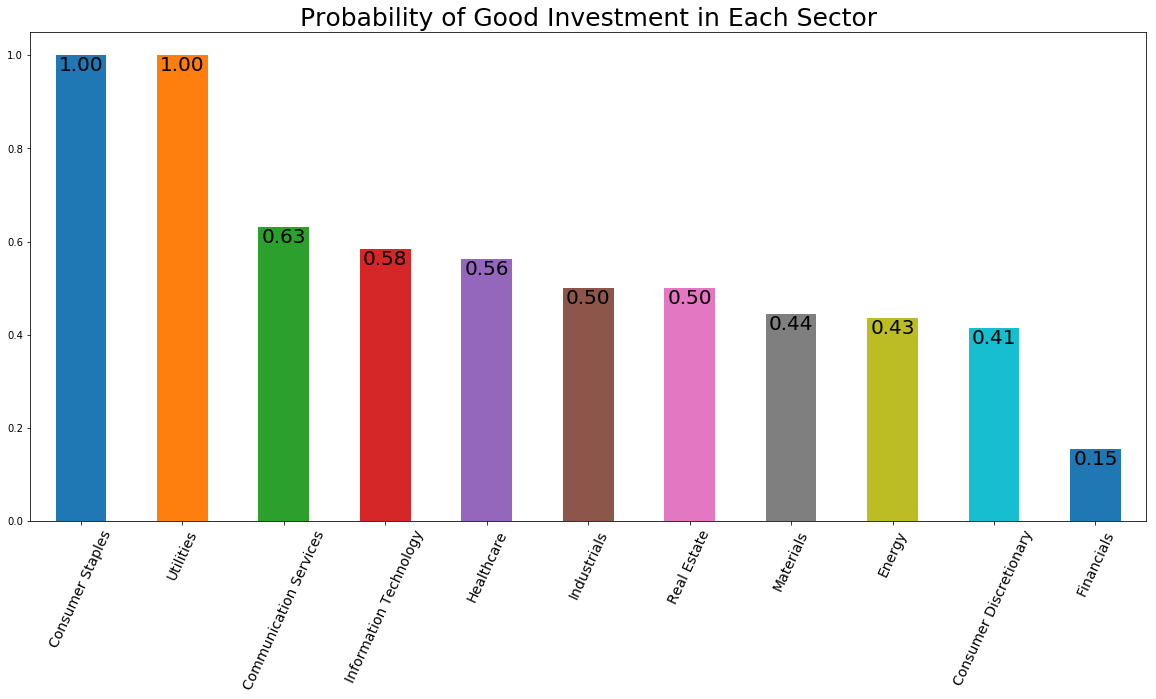

In [20]:
plt.figure(figsize=(20,9))
plt.title('Probability of Good Investment in Each Sector',fontsize=25)
prob_sector = prob_df['Likelihood_of_Good_Investment'].plot(kind='bar')

for each in prob_sector.patches:
    prob_sector.annotate(format(each.get_height(), '.2f'),
                   (each.get_x() + each.get_width() / 2,
                   each.get_height()),ha='center',va='center',
                   size=20, xytext=(0,-10),
                   textcoords='offset points')
plt.xticks(fontsize=14,rotation=65)
plt.show()

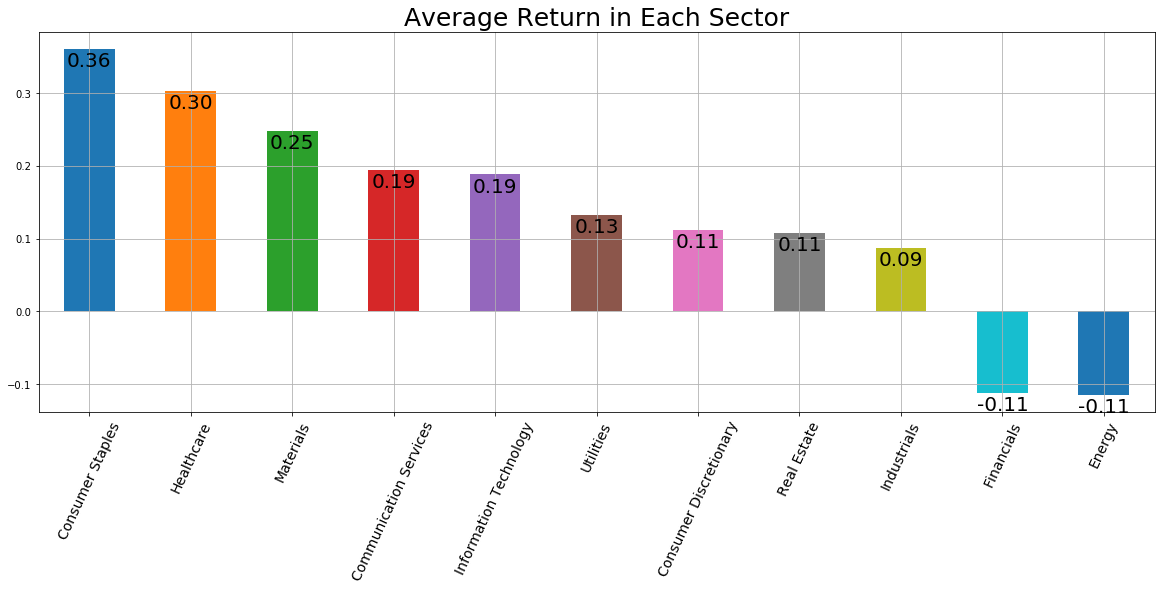

In [25]:
#Create visual for average return in each sector
plt.figure(figsize=(20,7))
plt.title('Average Return in Each Sector',fontsize=25)

sorted_avg_return_by_sector = real_deal_df.groupby('Sector').describe()['1-Year_Return_As_Decimal']['mean'].sort_values(ascending=False)
sorted_return_plot = sorted_avg_return_by_sector.plot(kind='bar')

for each in sorted_return_plot.patches:
    sorted_return_plot.annotate(format(each.get_height(), '.2f'),
                   (each.get_x() + each.get_width() / 2,
                   each.get_height()),ha='center',va='center',
                   size=20, xytext=(0,-12),
                   textcoords='offset points')

plt.xticks(fontsize=14,rotation=65)
plt.xlabel(s='',fontsize=17)    
plt.grid()
plt.show()

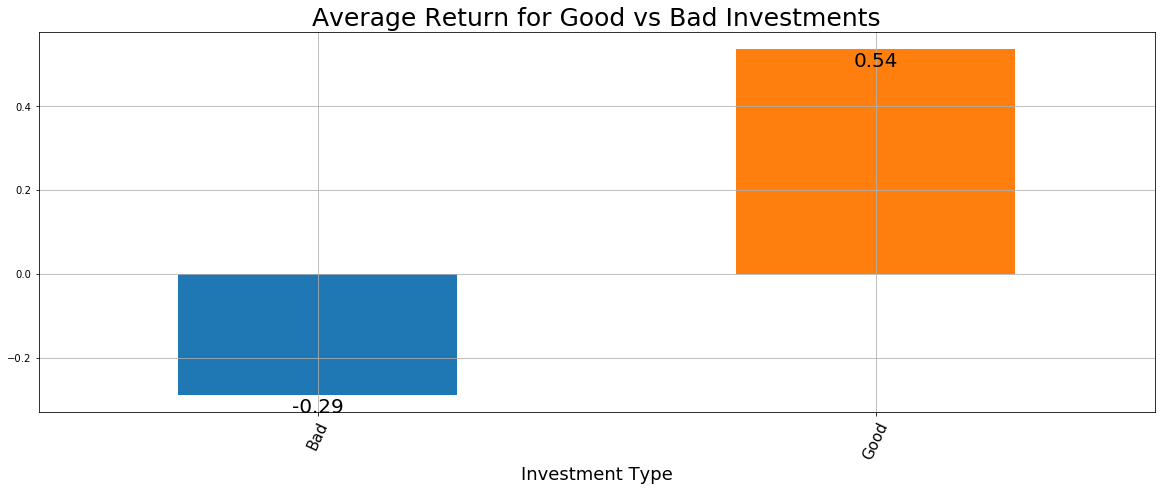

In [42]:
#Visualize average return for good vs bad investments
avg_return_good_and_bad = real_deal_df.groupby('Decision').describe()['1-Year_Return_As_Decimal']['mean']
plt.figure(figsize=(20,7))
plt.title('Average Return for Good vs Bad Investments',fontsize=25)
avg_return_good_and_bad_plot = avg_return_good_and_bad.plot(kind='bar')

for each in avg_return_good_and_bad_plot.patches:
    avg_return_good_and_bad_plot.annotate(format(each.get_height(), '.2f'),
                   (each.get_x() + each.get_width() / 2,
                   each.get_height()),ha='center',va='center',
                   size=20, xytext=(0,-12),
                   textcoords='offset points')

plt.xlabel(s='Investment Type',fontsize=18) 
plt.xticks(fontsize=15,rotation=65)
plt.grid()
plt.show()

In [180]:
#Stocks priced at 100 or less
real_deal_df[real_deal_df['P0']<=100].count()['Spinoff_Name']

167

In [183]:
#Total stocks in final data set
real_deal_df['Spinoff_Name'].count()

176

In [185]:
#Stocks priced at 100 or less and had a return of at least 10%
real_deal_df[(real_deal_df['P0']<=100) & (real_deal_df['1-Year_Return_As_Decimal']>=.1)].count()['Spinoff_Name']

81

In [187]:
#Average return for stocks that are affordable and good investments
real_deal_df[(real_deal_df['P0']<=100) & (real_deal_df['1-Year_Return_As_Decimal']>=.1)]['1-Year_Return_As_Decimal'].mean()
#Average return for stocks that are affordable and good investments is 55%!!! That would be an exceptional annual return every year

0.5461109409506173

In [186]:
#The real cream of the crop make up 46% of the data set. That's a pretty good sized subset for an area of stocks
#that is traditionally very niche and can be tricky to understand
real_deal_df[(real_deal_df['P0']<=100) & (real_deal_df['1-Year_Return_As_Decimal']>=.1)].count()['Spinoff_Name'] / real_deal_df['Spinoff_Name'].count()

0.4602272727272727

In [ ]:
#Metrics and Visuals for Data Analysis
#Split of investments into price point buckets -- check
#Total good investments vs bad -- check
#Probability of good investment on average per sector -- check
#Average return per sector -- check
#Average return for good vs bad investments -- check
#How many initial prices were under $100 USD? -- check